# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data (replace with your file paths)
file_paths = {
    "Netflix_Titles": r"C:\Users\zixin kuai\Desktop\DIGS 20004\Netflix\Cleaned_Netflix_Titles_Data.csv",
}


In [4]:
# Read CSV files into DataFrames
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

In [6]:
## Step 1: Descriptive Statistics
print("\n### Step 1: Descriptive Statistics ###")
eda_results = {}

for name, df in dfs.items():
    print(f"\nDescriptive Statistics for {name}:")
    numeric_desc = df.describe().T  # Transpose for readability
    print(numeric_desc)

    # Save results for later use
    eda_results[name] = {"Descriptive Statistics": numeric_desc}


### Step 1: Descriptive Statistics ###

Descriptive Statistics for Netflix_Titles:
               count         mean       std     min     25%     50%     75%  \
release_year  8807.0  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0   

                 max  
release_year  2021.0  



### Step 2: Categorical Variable Analysis ###

Top Categories for Netflix_Titles:

Column: show_id
show_id
s8807    1
s1       1
s2       1
s3       1
s4       1
s5       1
s6       1
s8791    1
s8790    1
s8789    1
Name: count, dtype: int64


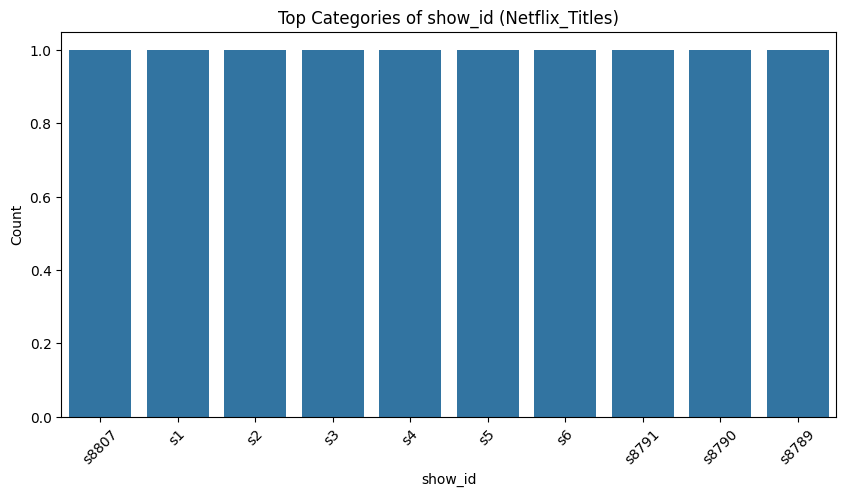


Column: type
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


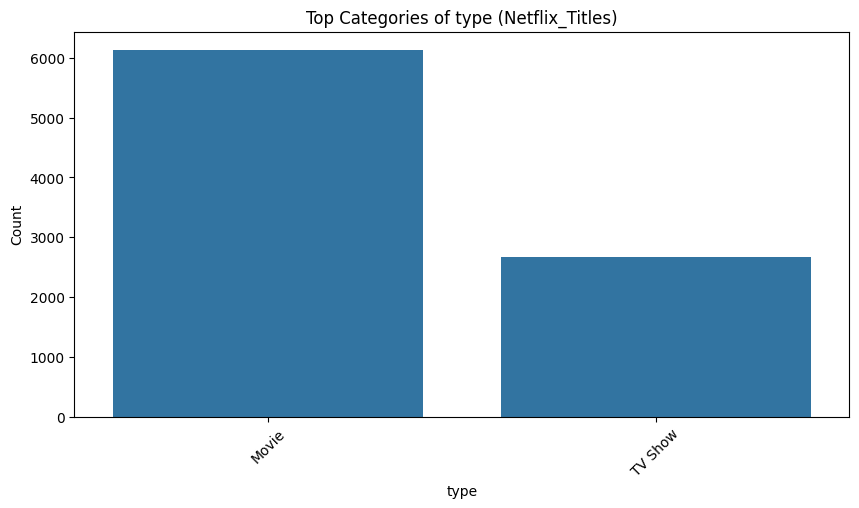


Column: title
title
Zubaan                           1
Dick Johnson Is Dead             1
Blood & Water                    1
Ganglands                        1
Jailbirds New Orleans            1
Kota Factory                     1
Midnight Mass                    1
You Don't Mess with the Zohan    1
You Changed My Life              1
You Carry Me                     1
Name: count, dtype: int64


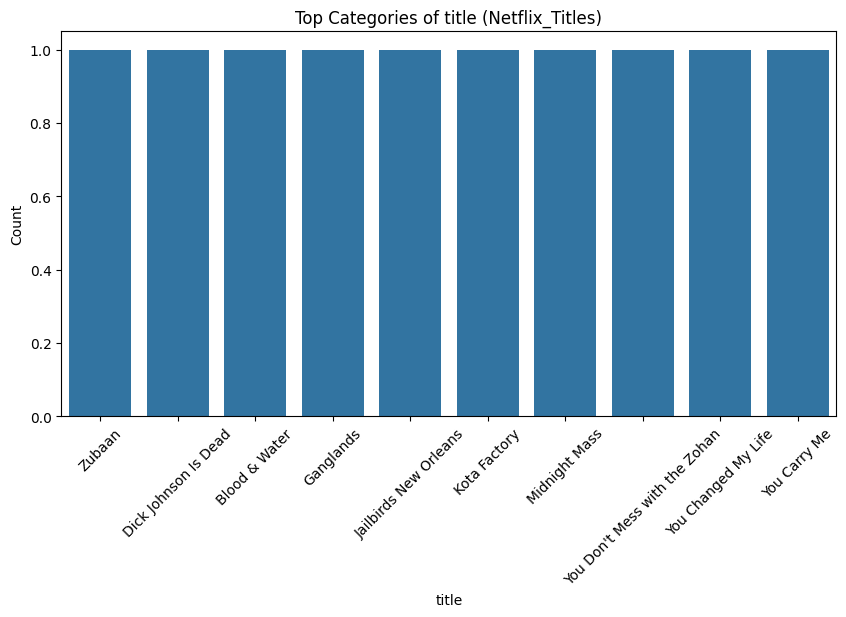


Column: director
director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


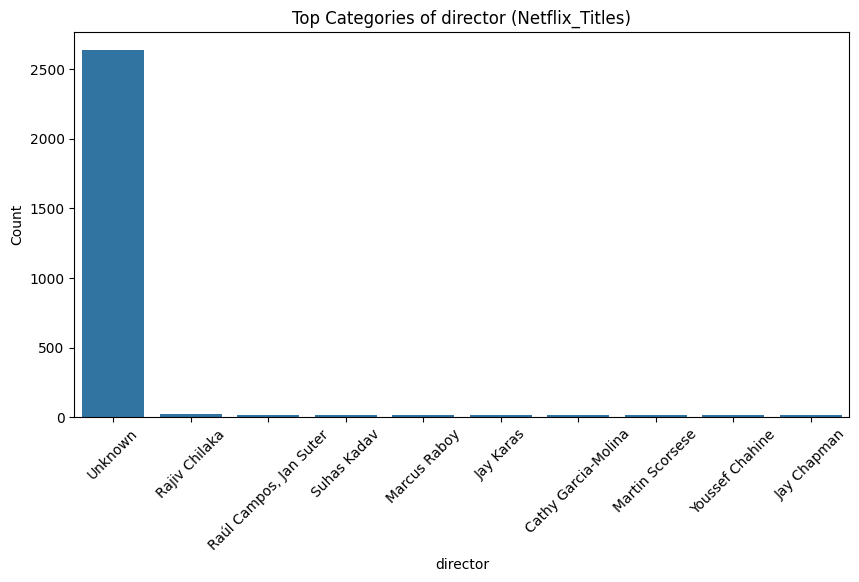


Column: cast
cast
Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Kevin Hart                                                                                                                  6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                                       

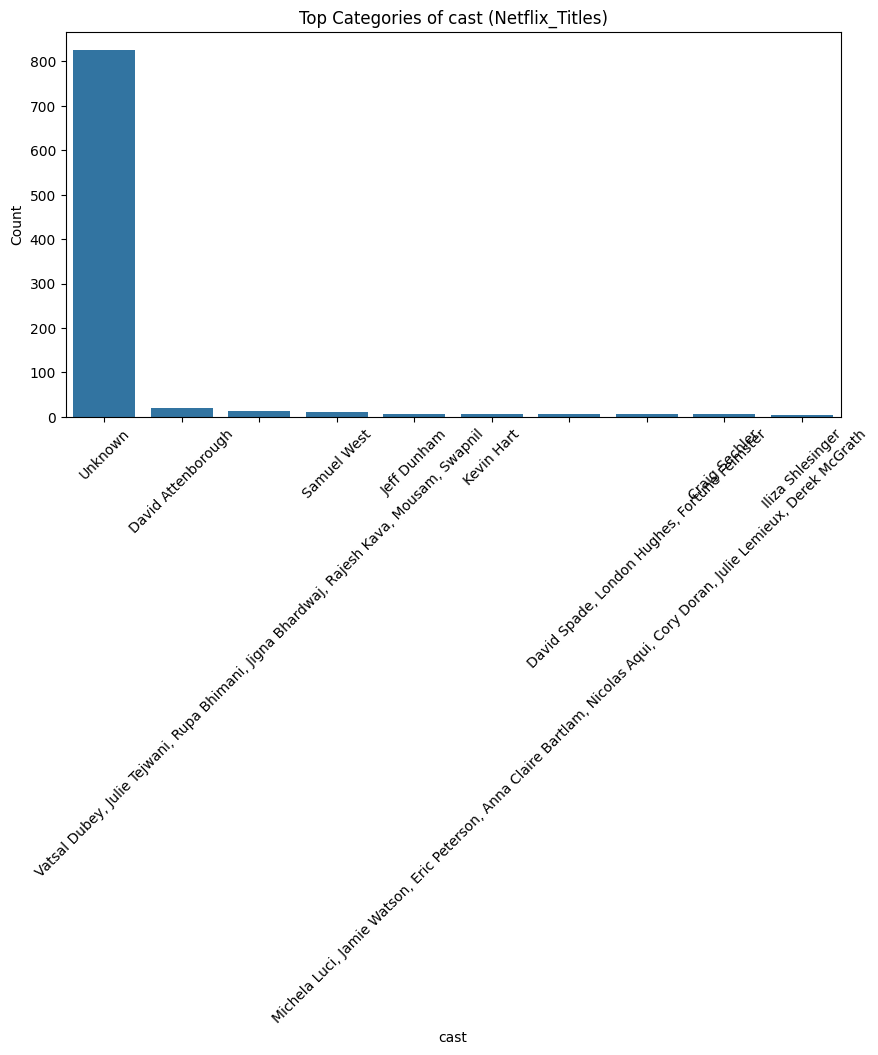


Column: country
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


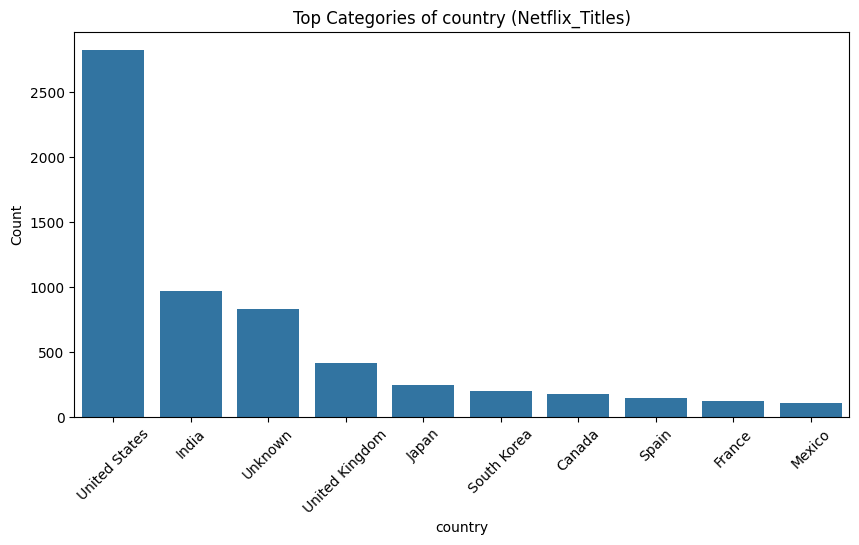


Column: date_added
date_added
2020-01-01    109
2019-11-01     89
2018-03-01     75
2019-12-31     74
2018-10-01     71
2019-10-01     60
2021-07-01     60
2018-11-01     60
2021-09-01     56
2019-07-01     52
Name: count, dtype: int64


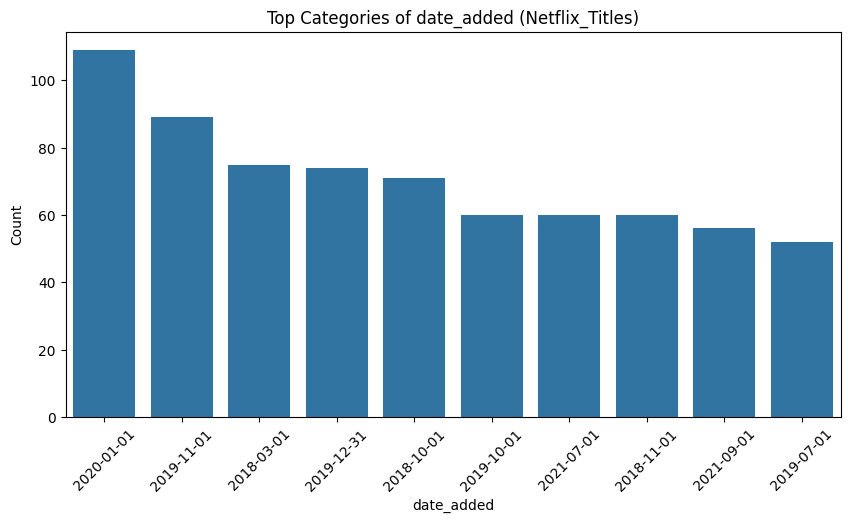


Column: rating
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


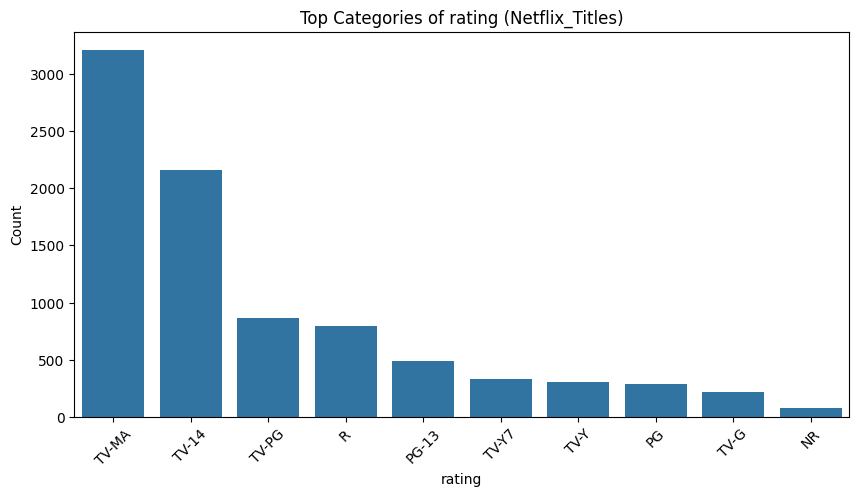


Column: duration
duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64


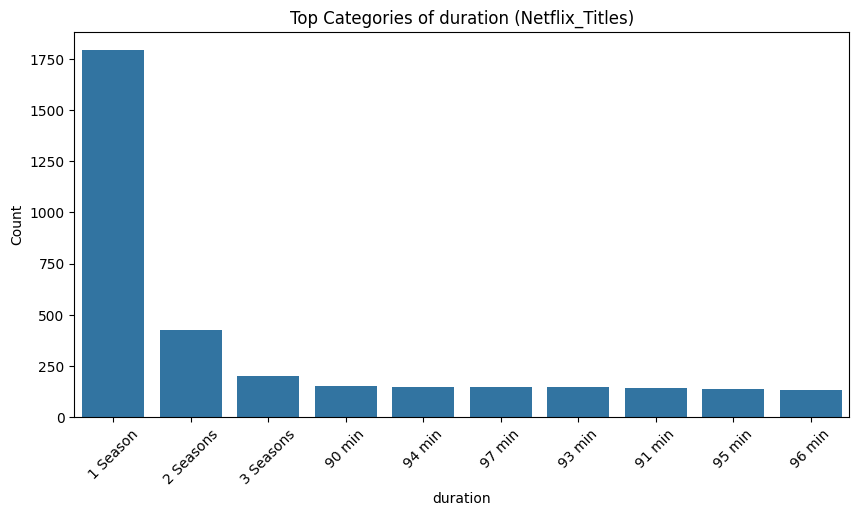


Column: listed_in
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


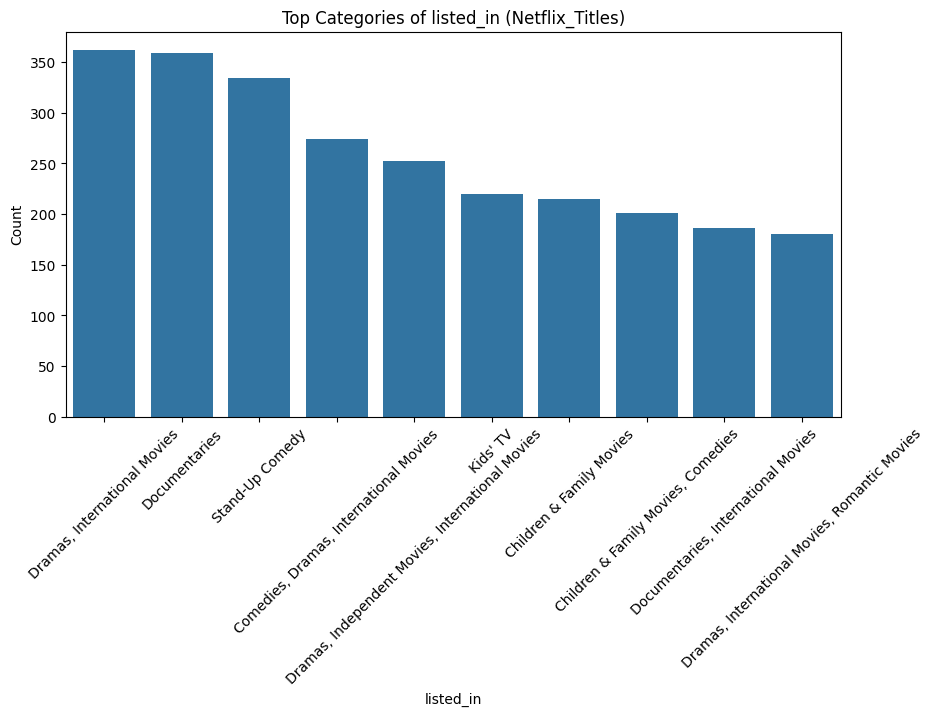


Column: description
description
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
As a woman scours Hyderabad for her missing husband, she becomes entangled in a conspiracy that suggests there’s more to the mystery than meets the eye.     2
With their biggest foe seemingly defeated, InuYasha and his friends return to everyday life. But the peace is soon shattered by an emerging new enemy.       2
The Great Dog

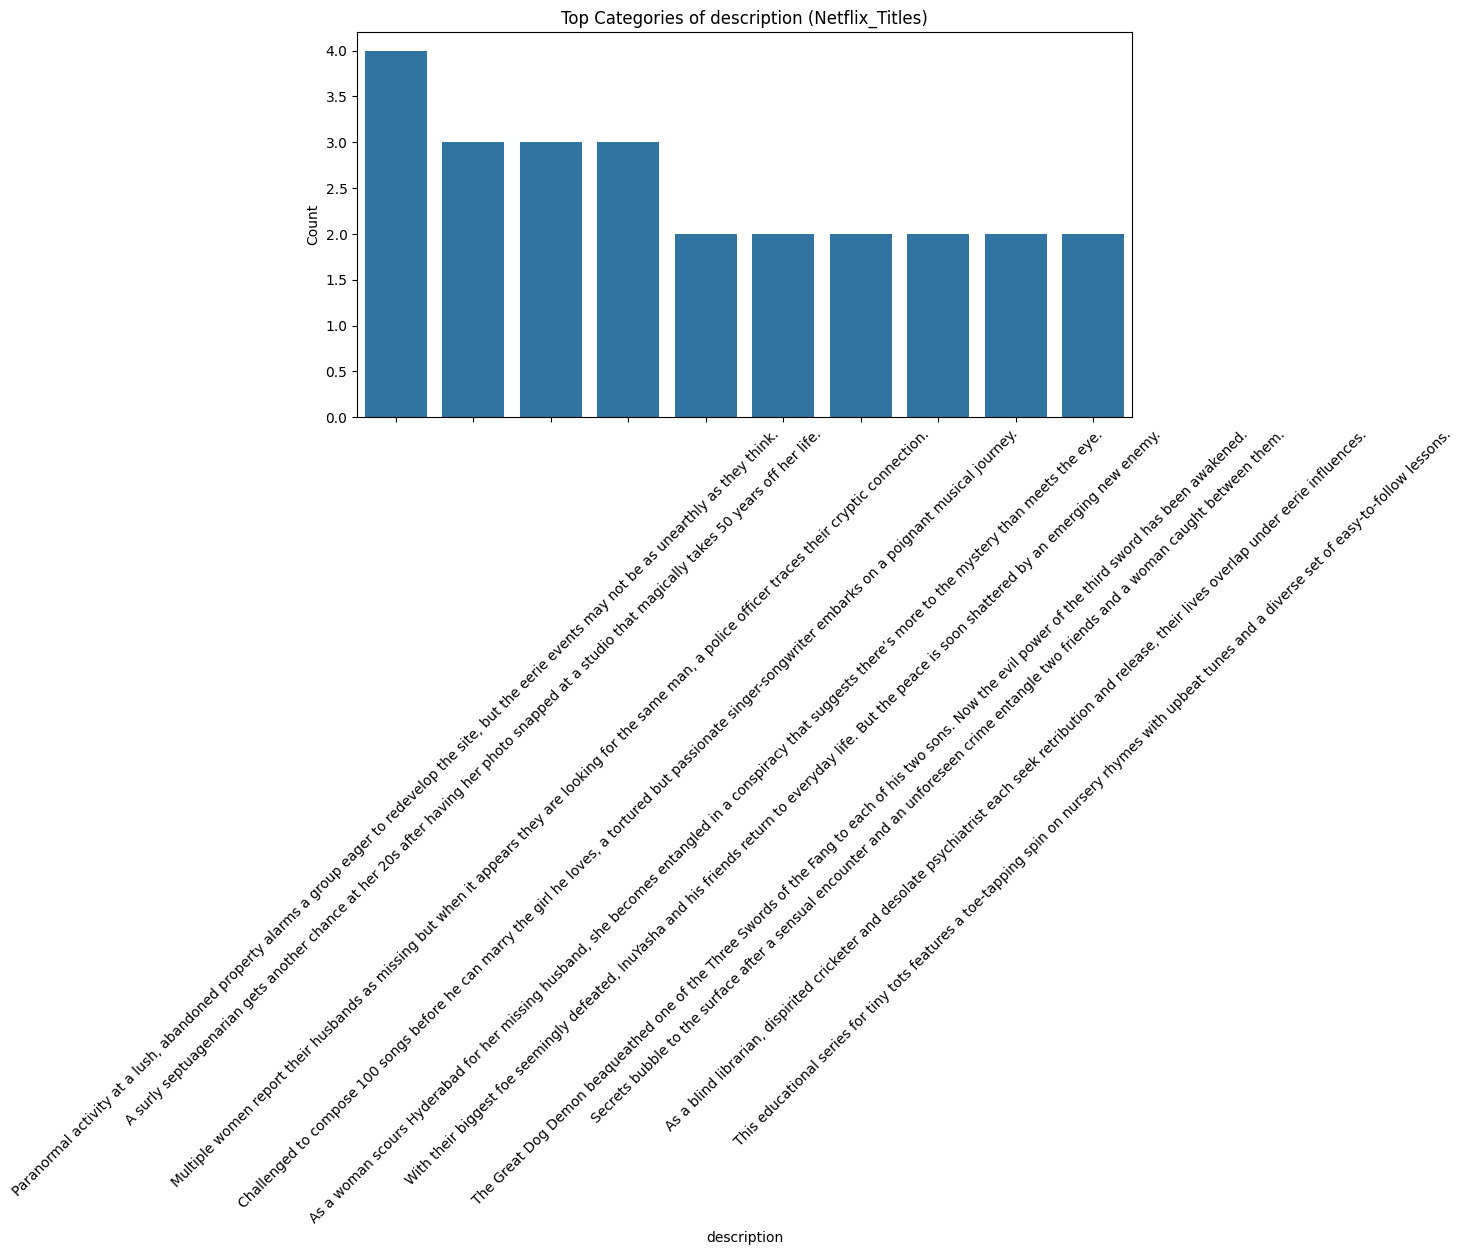

In [7]:
## Step 2: Categorical Variable Analysis
print("\n### Step 2: Categorical Variable Analysis ###")
for name, df in dfs.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\nTop Categories for {name}:")
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().head(10))
        
        
        # Bar plot for categorical data distribution
        plt.figure(figsize=(10, 5))
        sns.barplot(x=df[col].value_counts().head(10).index, y=df[col].value_counts().head(10).values)
        plt.xticks(rotation=45)
        plt.title(f"Top Categories of {col} ({name})")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()



In [10]:
## Step 3: Correlation Analysis for TMDB and Netflix Data
print("\n### Step 3: Correlation Analysis ###")
for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:  # Ensure there are numerical columns to analyze
        correlation_matrix = df[numeric_cols].corr()

        # Display correlation matrix
        print(f"\nCorrelation Matrix for {name}:")
        print(correlation_matrix)

        # Plot heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title(f"Correlation Matrix - {name}")
        plt.show()

        # Specific correlation analysis: Revenue vs Budget for TMDB Movies
        if name == "netflix_titles" and "revenue" in df.columns and "budget" in df.columns:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=df["budget"], y=df["revenue"], alpha=0.5)
            plt.title("Revenue vs Budget Relationship (TMDB Movies)")
            plt.xlabel("Budget")
            plt.ylabel("Revenue")
            plt.xscale("log")  # Log scale for better visualization if values vary significantly
            plt.yscale("log")
            plt.grid(True, linestyle="--", alpha=0.5)
            plt.show()

print("\n### EDA Completed Successfully ###")


### Step 3: Correlation Analysis ###

### EDA Completed Successfully ###


In [11]:
# Function to calculate outlier percentage using IQR method
def outlier_percentage_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers) / len(df) * 100

# Function to calculate outlier percentage using Z-score method
def outlier_percentage_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[np.abs((df[column] - mean) / std) > threshold]
    return len(outliers) / len(df) * 100

# Identify numeric columns in each dataset
outlier_results = {}

for name, df in dfs.items():
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    outliers_info = {}
    
    for col in numeric_cols:
        iqr_outliers = outlier_percentage_iqr(df, col)
        zscore_outliers = outlier_percentage_zscore(df, col)
        outliers_info[col] = {
            "IQR_Outliers (%)": iqr_outliers,
            "Z-score_Outliers (%)": zscore_outliers
        }
    
    outlier_results[name] = outliers_info

# Convert results to DataFrame for better visualization
outlier_results_df = {name: pd.DataFrame.from_dict(data, orient="index") for name, data in outlier_results.items()}

# Categorize columns based on outlier percentage thresholds
high_outlier_columns = {}  # >10%
moderate_outlier_columns = {}  # 5%-10%

for name, df in outlier_results_df.items():
    high_outliers = df[df["IQR_Outliers (%)"] > 10].index.tolist()
    moderate_outliers = df[(df["IQR_Outliers (%)"] > 5) & (df["IQR_Outliers (%)"] <= 10)].index.tolist()

    if high_outliers:
        high_outlier_columns[name] = high_outliers
    if moderate_outliers:
        moderate_outlier_columns[name] = moderate_outliers

# Display high and moderate outlier columns
print("Columns with High Outliers (>10%):", high_outlier_columns)
print("Columns with Moderate Outliers (5%-10%):", moderate_outlier_columns)

print("Outlier analysis completed successfully.")


Columns with High Outliers (>10%): {}
Columns with Moderate Outliers (5%-10%): {'Netflix_Titles': ['release_year']}
Outlier analysis completed successfully.


In [ ]:
# Check for anomalies in release_year (Netflix dataset)
netflix_years = dfs["Netflix_Titles"]["release_year"]

# Find min and max release years
min_year = netflix_years.min()
max_year = netflix_years.max()

# Identify possible erroneous values (e.g., very old years or future years)
current_year = pd.Timestamp.now().year
invalid_years = netflix_years[(netflix_years < 1900) | (netflix_years > current_year)]

# Display results
print(f"Min release year: {min_year}")
print(f"Max release year: {max_year}")
print("Potential erroneous release years:", invalid_years.unique())

print("Release year anomaly check completed successfully.")

Min release year: 1925
Max release year: 2021
Potential erroneous release years: []
Release year anomaly check completed successfully.


: 